In [5]:
# autograd (automatic gradient) is an engine to do backprop
# calc loss func wrt weights of a neural network (at the core of nn libs)
# recursively applies calc chain rule to find d(g) w respect to all preceding nodes, a,b,c,d..
# this is important to see how a, b.. (internal nodes) affect g,
# how g responds when a, b tweaked tiny
# micrograd is a scalar valued autograd engine, in prod lib you'd vectorise into tensors
# the math doesn't change regardless of if tensor or scalars, the scalars are just packed into tensors


In [6]:
%pip install matplotlib
%pip install numpy
import math
import matplotlib as plt
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
def f(x): 
    return 6*x**2 + 3*x + 12

In [8]:
f(3.0)

75.0

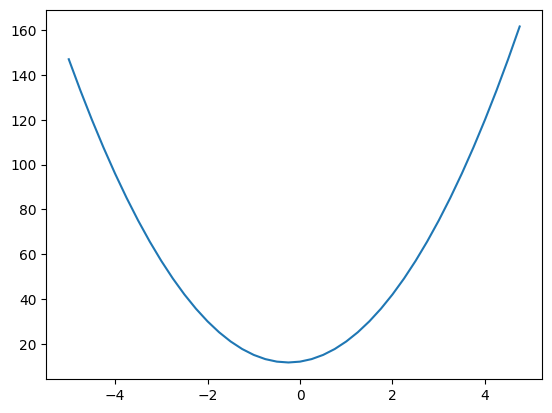

In [9]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
plt.plot (xs,ys)

In [10]:
h = 0.00001
x = 0.3
dx= ( f(x+h) - f(x) ) / h
print(dx)

6.60006000003932


In [11]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print ('d1', d1)
print ('d2', d2)
print ('slope', (d2-d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [48]:
class Value:
    def __init__(self, data, _children=(), _op='', label = ''):
        self.data  = data
        self.grad  = 0
        self._prev = set (_children)
        self._op   = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data}, label={self.label})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

a = Value (2.0,  label = 'a')
b = Value (-3.0, label = 'b')
c = Value (10.0, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label = 'f')
L = d * f
L.label = 'L'
L

Value(data=-8.0, label=L)

In [32]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [33]:
d._op

'+'

In [43]:
%pip install graphviz
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format = 'svg', graph_attr= {'rankdir': 'LR'}) # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rect ('record') node for it
        dot.node(name = uid, label = "{ %s |  data %.4f }" % (n.label, n.data, ), shape='record')
        if n._op:
            # if this val is a result of some ops, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
            # connect n1 to the op node of n2
            dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

Note: you may need to restart the kernel to use updated packages.


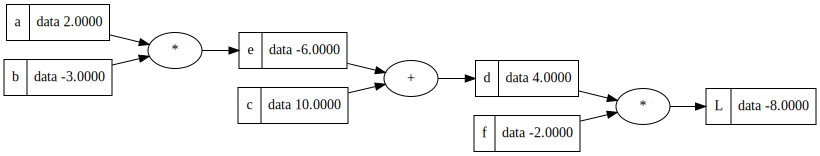

In [49]:
draw_dot(L)